In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
import spacy
import keras
from keras import layers,optimizers
from sklearn.metrics import root_mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [10]:
local = "..\..\Dataset\df_consolidado.csv"
df = pd.read_csv(local)

indices = df['Abstract'].dropna().index
colunas = ['Article Title','Times Cited, All Databases','Author Full Names','Abstract']

df= df.iloc[indices]
df = df[colunas]

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\davjo\AppData\Local\Temp\ipykernel_5300\2981142297.py:1: SyntaxWarning: invalid escape sequence '\.'
  local = "..\..\Dataset\df_consolidado.csv"
C:\Users\davjo\AppData\Local\Temp\ipykernel_5300\2981142297.py:2: DtypeWarning: Columns (4,5,8,11,15,16,17,18,19,43,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local)


In [6]:
df['Times Cited, All Databases'].describe()

count    133538.000000
mean         36.924726
std         142.969646
min           0.000000
25%           4.000000
50%          13.000000
75%          34.000000
max       19620.000000
Name: Times Cited, All Databases, dtype: float64

In [22]:
filtro = df['Times Cited, All Databases'] > 1000
df2 = df.loc[filtro]

In [23]:
df2['Times Cited, All Databases'].describe()



count      256.000000
mean      2164.304688
std       1963.083977
min       1005.000000
25%       1177.500000
50%       1570.000000
75%       2250.250000
max      19620.000000
Name: Times Cited, All Databases, dtype: float64

In [13]:
len(df2)/len(df)

0.7548413185759859

In [2]:
import pubchempy as pbp

In [11]:
pbp.get_compounds('nickel oxide','name')[0].canonical_smiles

'O=[Ni]'

(array([55918., 25206., 14604.,  9034.,  6149.,  4244.,  3064.,  2384.,
         1847.,  1478.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

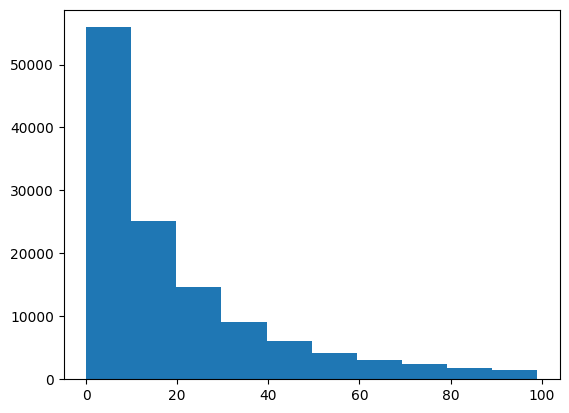

In [9]:
plt.hist(df['Times Cited, All Databases'])

In [56]:
nlp = spacy.load("en_core_web_sm",disable=['ner','parse'])
nlp.pipe_names

def spacy_tokenizer(doc):
  return [t.lemma_ for t in nlp(doc) if \
          not t.is_punct and \
          not t.is_space and \
          t.is_alpha 
          and not t.is_stop and 
          t.pos_ in ['NOUN','VERB']]
  
#vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer,lowercase=False,binary=True)


In [54]:
feature = 'Abstract'	
target = 'Times Cited, All Databases'
train_data, test_data, train_labels, test_labels = train_test_split(df[feature],df[target], train_size=0.8, random_state=1)


In [57]:
train_feature_vects = vectorizer.fit_transform(train_data)
test_feature_vects = vectorizer.transform(test_data)

In [63]:
def create_model(n_input):
    model = keras.models.Sequential([ 
         keras.Input(shape=(n_input,)),
         layers.Dense(40,activation='relu'),
         layers.Dense(1,activation='linear')]
    )
    
    opt = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=opt,loss='mse')
    
    return model
    

(array([165., 133., 108.,  59.,  64.,  46.,  32.,  39.,  22.,  22.,  11.,
         13.,  13.,   9.,   8.,   9.,   6.,   3.,   8.,   8.,   0.,   3.,
          2.,   4.,   2.,   1.,   2.,   0.,   1.,   3.]),
 array([ 0.        ,  3.13333333,  6.26666667,  9.4       , 12.53333333,
        15.66666667, 18.8       , 21.93333333, 25.06666667, 28.2       ,
        31.33333333, 34.46666667, 37.6       , 40.73333333, 43.86666667,
        47.        , 50.13333333, 53.26666667, 56.4       , 59.53333333,
        62.66666667, 65.8       , 68.93333333, 72.06666667, 75.2       ,
        78.33333333, 81.46666667, 84.6       , 87.73333333, 90.86666667,
        94.        ]),
 <BarContainer object of 30 artists>)

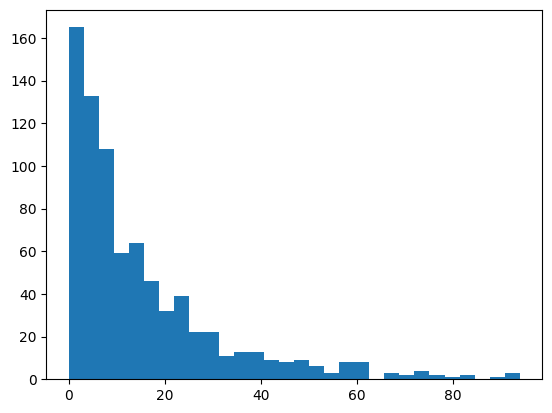

In [64]:
plt.hist(train_labels,bins=30)

In [ ]:
epocas = 100

modelo = create_model(train_feature_vects.get_shape()[1])
modelo.fit(train_feature_vects.toarray(),train_labels,epochs=epocas,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 438.4628
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 448.3600
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 342.5043
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 280.6943
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 277.8925
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 275.9859
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 231.7724
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 221.3997
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 217.3960
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 194.2875
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 184.1062
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 179.9242
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 156.0747
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 134.6617
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [71]:
predicao = modelo.predict(train_feature_vects.toarray())


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Text(0, 0.5, 'Número predito de citações')

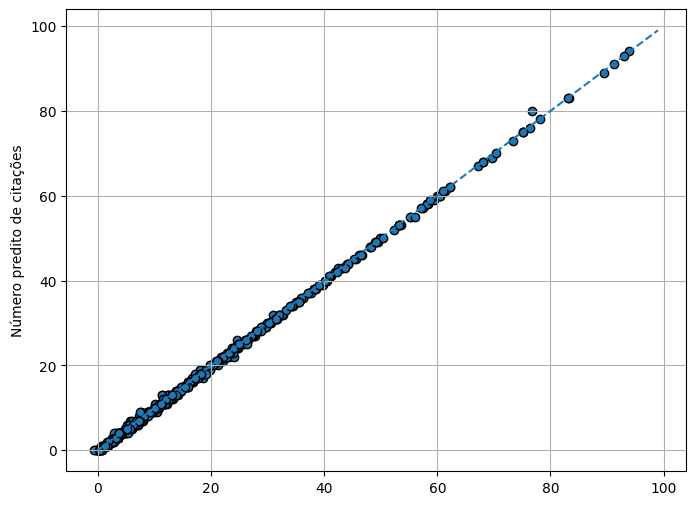

In [72]:
plt.figure(figsize=(8,6))
plt.grid()
plt.plot([min(test_labels),max(test_labels)],[min(test_labels),max(test_labels)],linestyle='--')
plt.scatter(predicao,train_labels,edgecolors='black')
plt.ylabel("Número real de citações")
plt.ylabel("Número predito de citações")